<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Привет! Спасибо, что исправил проект:) Ты проделал большую работу над ним, однако его еще можно улучшить. Будет здорово, если ты, надеюсь, не против, если я буду на ты, будешь отвечать на комментарии и участвовать в диалоге. 

Мои комментарии обозначены пометкой **Комментарий ревьюера**. Далее в файле ты сможешь найти их в похожих ячейках (если фон комментария <font color=green>зелёный</font> - всё сделано правильно. Рекомендации укажу таким же цветом; <font color=orange>оранжевый</font> - некритичные замечания. Если таких замечаний меньше трех - проект может быть принят без их отработки; <font color=red>красный</font> - нужно переделать). Не удаляй эти комментарии и постарайся учесть их в ходе выполнения данного проекта. 
</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера 0</b></font>

Привет, Артем! Спасибо, что прислал задание:) Меня зовут Слепцов Артем и я буду проверять твой проект) К сожалению, я не могу запустить твой проект полностью из-за ошибки в коде. Пожалуйста, посмотри, что пошло не так. Как исправишь, присылай работу снова. Буду ждать :)
</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий студента</b></font>

Привет, Артем! Поправил ошибки. Они возникли из-за разницы в версиях библиотек ;( Я писал тетрадку у себя на компьютере с более новыми версиями pandas и numpy
</div>

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

Стоит делать краткое вступление в работу, описание того, что надо делать. В работе необходимо приводить информацию о входных данных: какие столбцы есть в таблице, их названия и какую информацию они несут. Также название работы лучше отображать в отдельной ячейке и делать крупный шрифт (заголовок). Так работа выглядит презентабельно.

</div>

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>

Я заметил, что ячейки в твоей тетрадке начинаются не с 1. Перед отправкой работы рекомендую перезапускать ноутбук, чтобы убедиться, что все ячейки выполняются корректно.

</div>

In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats as st
from statsmodels.stats.weightstats import *
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)

%matplotlib inline 

In [2]:
print("python", sys.version)
print("pandas", pd.__version__)

python 3.7.8 | packaged by conda-forge | (default, Jul 31 2020, 02:25:08) 
[GCC 7.5.0]
pandas 0.25.1


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Правильно, что весь импорт ты проводишь в первой ячейке работы. Так твой коллега, запускающий работу, будет в курсе используемых в ней библиотек и сможет при необходимости быстро настроить окружение. 

</div>

# 1. Подготовка данных #

In [3]:
df = pd.read_csv('/datasets/games.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Сразу видим, что нужно переименовать столбцы: приведем все названия к нижнему регистру

In [4]:
df.set_axis(axis = 'columns', labels=['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'], inplace=True)
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>

Не надо переименовывать столбцы через атрибут columns, потому что так ты неявно учитываешь порядок столбцов. Если порядок столбцов поменяется, код перестанет работать. Используй вместо этого метод rename().
    
</div>

### 1.1 Преобразование типов

Посмотрим на типы данных в столбцах:

In [5]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 5.6 MB


Предположим, что набор значений в столбцах genre, rating сильно ограничен. Посмотрим на данные:

In [6]:
df.genre.unique(), df.rating.unique()

(array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
        'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
        'Strategy', nan], dtype=object),
 array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object))

Да, значений в столбцах не очень много, можно заменить их типы на category. 
Проведем следующие преобразования типов столбцов:
- **platform**: оставим как есть
- **year_of_release**: float64 заменим тип на uint16. Для хранения года выпуска игры удобнее будет использовать целочисленный неотрицательный тип uint16 - он может хранить в себе значения в диапазоне от 0 до 65535. Помимо того, что обрабатывать год как целое число несколько удобнее, такой заменой уменьшаем и количество памяти, необходимое для хранения этого столбца - каждое значение типа float64 имеет размер 8 байт, когда как uint16 - 2 байта.
- **genre**: object заменим на category
- **rating**: object заменим на category
- **user_score**: object заменим на float16. Зту замену необходимо произвести, так как в столбце хранится оценка пользователей, которая всегда будет иметь числовое значение.

In [7]:
df['genre'] = df['genre'].astype('category')
df['rating'] = df['rating'].astype('category')

Прежде чем заменить тип столбца **year_of_release**, необходимо обработать пропуски в этом столбце. В выводе функции info() выше видим, что в столбце около 200 пропусков. Убедимся, что пропущенные значения не принадлежат какой-то одной из платформ или значению рейтинга ESRB:

In [8]:
def get_grouped_stats(df, group_column, column, func, first_rows=5, ):
    matched_rows = df[func(df[column])].groupby(group_column)['name'].count()
    matched_rows.name = 'matched_rows_count'    
    rows_count = df.groupby(group_column)['name'].count()
    rows_count.name = 'rows_count'
    result = pd.concat([matched_rows, rows_count], axis=1, join='inner')
    result['rate'] = result.matched_rows_count / result.rows_count
    return result.sort_values(by='rate', ascending=False)[:first_rows]

In [9]:
get_grouped_stats(df, 'platform', 'year_of_release', pd.isnull)

,matched_rows_count,rows_count,rate
platform,,,
2600,17,133,0.127820
Wii,34,1320,0.025758
XB,21,824,0.025485
GC,14,556,0.025180
X360,30,1262,0.023772


In [10]:
get_grouped_stats(df, 'rating', 'year_of_release', pd.isnull)

,matched_rows_count,rows_count,rate
rating,,,
RP,2,3,0.666667
E10+,27,1420,0.019014
T,56,2961,0.018913
E,69,3990,0.017293
M,27,1563,0.017274


Если пропущенные в столбце year_of_release распределены практически равномерно по типам платформ, то в отношении столбца с рейтингом есть интересное замечание. Для 2 из 3 записей с рейтингом RP пропущено значение в столбце year_of_release.
Путем поиска в Яндекс узнаем, что RP значит Rating Pending, т.е. рейтинг ожидается. Посмотрим, что это за игры:

In [11]:
df[df.rating == 'RP']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
13672,Clockwork Empires,PC,NaN,Strategy,0.0,0.04,0.0,0.00,58.0,3.8,RP
14270,Supreme Ruler: Cold War,PC,2011.0,Strategy,0.0,0.03,0.0,0.01,63.0,6.8,RP
16180,WRC: FIA World Rally Championship,PC,NaN,Racing,0.0,0.01,0.0,0.00,65.0,NaN,RP


Так как таких строки всего 3, попробуем заполнить данные самостоятельно. Путем поиска на ресурсах [ESRB](https://www.esrb.org/) и [Metacritic](https://www.metacritic.com/) находим следующую информацию:
- **Supreme Ruler: Cold War** [получила](https://www.esrb.org/ratings/31253/Supreme+Ruler+Cold+War/) на ESRB рейтинг E10+
- **WRC: FIA World Rally Championship** [вышла в релиз](https://www.metacritic.com/game/pc/wrc-fia-world-rally-championship) на PC в 2010 году, однако по состоянию на 2021 так и не получила свой уровень рейтинга от ESRB. Можно просто удалить данную запись из таблицы.
- **Clockwork Empires** [вышла в релиз](https://www.metacritic.com/game/pc/clockwork-empires) в 2016 году, но также до сих пор не получила свой рейтинг от ESRB. Также удаляем эту запись, тем самым полностью избавляясь от категории 'RP' в столбце rating

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Руками, конечно, лучше не делать замены. Но строк не так много, поэтому такой способ пройдет. 
    
</div>

In [12]:
#удаляем ненужные записи
df.drop(df.loc[(df['name']=='WRC: FIA World Rally Championship') & (df['platform']=='PC')].index, inplace=True)
df.drop(df.loc[(df['name']=='Clockwork Empires') & (df['platform']=='PC')].index, inplace=True)

#меняем рейтинг для Supreme Ruler: Cold War
df.loc[df[df.name == 'Supreme Ruler: Cold War'].index, 'rating'] = 'E10+'

#меняем тип столбца rating на category
df.rating.cat.set_categories(df.rating.unique().categories, inplace=True)

In [13]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16711 non-null object
platform           16713 non-null object
year_of_release    16446 non-null float64
genre              16711 non-null category
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8135 non-null float64
user_score         10013 non-null object
rating             9947 non-null category
dtypes: category(2), float64(6), object(3)
memory usage: 4.6 MB


Видим, что пропуски распределены по разным значениям категориальных переменных. Так как количество пропусков в целом небольшое по сравнению с размером датасета, просто удалим записи с пропущенными значениями в этом столбце. Удалим пропуски и поменяем тип столбца:

In [14]:
#удаляем пропуски в столбце year_of_release
df.dropna(subset=['year_of_release'], inplace=True)
#меняем тип столбца year_of_release на uint16
df['year_of_release'] = df['year_of_release'].astype('uint16')
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16446 non-null object
year_of_release    16446 non-null uint16
genre              16444 non-null category
na_sales           16446 non-null float64
eu_sales           16446 non-null float64
jp_sales           16446 non-null float64
other_sales        16446 non-null float64
critic_score       7983 non-null float64
user_score         9839 non-null object
rating             9768 non-null category
dtypes: category(2), float64(5), object(3), uint16(1)
memory usage: 3.8 MB


Помимо большого количества пропусков в столбцах **critic_score**, **user_score**, **rating** остались еще записи с 2 пропусками в столбцах **name** и **genre**. Взглянем на них:

In [15]:
df[df.genre.isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Тоже смело можно удалять:

In [16]:
#удаляем все строки с пропусками в столбцах name и genre
df.dropna(subset=['name', 'genre'], inplace=True)
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null uint16
genre              16444 non-null category
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         9839 non-null object
rating             9768 non-null category
dtypes: category(2), float64(5), object(3), uint16(1)
memory usage: 3.8 MB


Дальше необходимо поменять тип в столбце **user_score** на float64, посколько там хранятся оценки пользователей, что явно должно храниться в числовом виде. Однако известно, что в столбце содержатся значения нечислового типа, а именно 'tbd', что означает to be determined, т.е. будет определен в будущем. Посмотрим, сколько таких данных и как они распределены:

In [17]:
df[df['user_score'] == 'tbd'].shape

(2376, 11)

In [18]:
get_grouped_stats(df, 'year_of_release', 'user_score', lambda x: x =='tbd', 10)

,matched_rows_count,rows_count,rate
year_of_release,,,
2009,405,1426,0.284011
2010,331,1255,0.263745
2002,192,829,0.231604
2008,326,1427,0.228451
2011,217,1136,0.191021
2001,82,482,0.170124
2007,192,1197,0.160401
2004,107,762,0.140420
2005,121,939,0.128860


Видно, что таких значений достаточно много. Посмотрим на корреляцию признаков **user_score** и **critic_score**:

In [19]:
df[~df['critic_score'].isnull()]['critic_score'] \
.corr \
(df[(df['user_score'] != 'tbd') & (~df['user_score'].isnull())]['user_score'].astype(float))

0.5796706281932221

Признаки имеют явную корреляцию: чем больше critic_score, тем больше user_score. **Заполним значения 'tbd' в user_score значениями critic_score / 10** и заново посчитаем корреляцию между признаками

In [20]:
df.loc[df[df['user_score'] == 'tbd'].index, 'user_score'] = df[df['user_score'] == 'tbd']['critic_score'] / 10

In [21]:
df[~df['critic_score'].isnull()]['critic_score'] \
.corr \
(df[(df['user_score'] != 'tbd') & (~df['user_score'].isnull())]['user_score'].astype(float))

0.6392295231844172

Корреляция увеличилась не сильно, будем считать такое преобразование user_score приемлимым.
Заменим, наконец, тип столбца user_score на float16:

In [22]:
df['user_score'] = df['user_score'].astype('float16')
df['critic_score'] = df['critic_score'].astype('float16')
df['other_sales'] = df['other_sales'].astype('float16')
df['jp_sales'] = df['jp_sales'].astype('float16')
df['eu_sales'] = df['eu_sales'].astype('float16')
df['na_sales'] = df['na_sales'].astype('float16')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null uint16
genre              16444 non-null category
na_sales           16444 non-null float16
eu_sales           16444 non-null float16
jp_sales           16444 non-null float16
other_sales        16444 non-null float16
critic_score       7983 non-null float16
user_score         8519 non-null float16
rating             9768 non-null category
dtypes: category(2), float16(6), object(2), uint16(1)
memory usage: 1.3+ MB


### 1.2 Обработка пропусков

Посмотрим теперь на пропуски в столбцах user_score и critic_score. Найдем количество строк, в которых пропущены значения в обоих столбцах:

In [23]:
df[(df.user_score.isnull()) & (df.critic_score.isnull())].shape

(7892, 11)

Таких строк очень много! Можно было бы попробовать восстановить их, например, линейной регрессией, но про машинное обучение мы еще не слышали ;(, да и качество таких данных было бы очень сомнительным (заполнять оценки пользователей или критиков, неблагодарное занятие, на мой взгляд). Поэтому просто удалим безнадежные строки, благо достаточно данных для анализа у нас еще останется

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

Нет, удалять также не вариант. Так ты серьезно исказишь проводимый анализ. То что у игры нет оценки не значит, что самой игры нет. Она есть, у нее были продажи. Заполнить не можем, удалить также не можем. Остается только оставить такие пропуски в данных и исключать их в тех разделах анализа, где они будут мешать. 
    
</div>

In [24]:
df.drop(df.loc[(df.user_score.isnull()) & (df.critic_score.isnull())].index, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8552 entries, 0 to 16705
Data columns (total 11 columns):
name               8552 non-null object
platform           8552 non-null object
year_of_release    8552 non-null uint16
genre              8552 non-null category
na_sales           8552 non-null float16
eu_sales           8552 non-null float16
jp_sales           8552 non-null float16
other_sales        8552 non-null float16
critic_score       7983 non-null float16
user_score         8519 non-null float16
rating             8456 non-null category
dtypes: category(2), float16(6), object(2), uint16(1)
memory usage: 334.8+ KB


Удалим еще ~70 строк с пустым critic_score

In [25]:
df.drop(df.loc[df.critic_score.isnull()].index, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7983 entries, 0 to 16705
Data columns (total 11 columns):
name               7983 non-null object
platform           7983 non-null object
year_of_release    7983 non-null uint16
genre              7983 non-null category
na_sales           7983 non-null float16
eu_sales           7983 non-null float16
jp_sales           7983 non-null float16
other_sales        7983 non-null float16
critic_score       7983 non-null float16
user_score         7950 non-null float16
rating             7902 non-null category
dtypes: category(2), float16(6), object(2), uint16(1)
memory usage: 312.6+ KB


и ~80 строк с пустым rating

In [26]:
df.drop(df.loc[df.rating.isnull()].index, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7902 entries, 0 to 16702
Data columns (total 11 columns):
name               7902 non-null object
platform           7902 non-null object
year_of_release    7902 non-null uint16
genre              7902 non-null category
na_sales           7902 non-null float16
eu_sales           7902 non-null float16
jp_sales           7902 non-null float16
other_sales        7902 non-null float16
critic_score       7902 non-null float16
user_score         7878 non-null float16
rating             7902 non-null category
dtypes: category(2), float16(6), object(2), uint16(1)
memory usage: 309.4+ KB


Оставшиеся пропуски в строке user_score заполним путем деления на 10 critic_score в соответствующих строках

In [27]:
df.loc[df[df['user_score'].isnull()].index, 'user_score'] = df[df['user_score'].isnull()]['critic_score'] / 10
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7902 entries, 0 to 16702
Data columns (total 11 columns):
name               7902 non-null object
platform           7902 non-null object
year_of_release    7902 non-null uint16
genre              7902 non-null category
na_sales           7902 non-null float16
eu_sales           7902 non-null float16
jp_sales           7902 non-null float16
other_sales        7902 non-null float16
critic_score       7902 non-null float16
user_score         7902 non-null float16
rating             7902 non-null category
dtypes: category(2), float16(6), object(2), uint16(1)
memory usage: 1.5 MB


Получен датасет с правильными типами данных и с отсутствующими пропусками. Пришлось потерять много данных. Можно идти дальше

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Ошибки в данных устранены. Данные подготовлены к дальнейшему анализу. Только оставь строки с пропусками. Удаление такого объема данных слишком критично скажется на дальнейшем анализе. 

</div>

# 2. Исследование данных

Добавим столбец с суммарными продажами по всем регионам

In [28]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.375000,28.953125,3.769531,8.453125,76.0,8.000000,E,82.500000
2,Mario Kart Wii,Wii,2008,Racing,15.679688,12.757812,3.789062,3.289062,82.0,8.296875,E,35.500000
3,Wii Sports Resort,Wii,2009,Sports,15.609375,10.929688,3.279297,2.949219,80.0,8.000000,E,32.750000
6,New Super Mario Bros.,DS,2006,Platform,11.281250,9.140625,6.500000,2.880859,89.0,8.500000,E,29.796875
7,Wii Play,Wii,2006,Misc,13.960938,9.179688,2.929688,2.839844,58.0,6.601562,E,28.906250


### 2.1 Распределение количества выпускаемых игр по годам

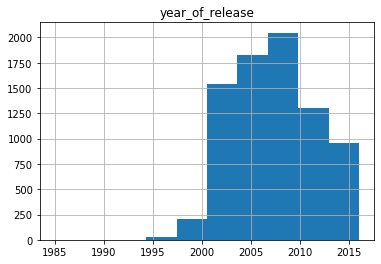

In [29]:
df.hist(column='year_of_release');

Из гистограммы видим, что распределение количества игр имеет левый хвост. Избавимся от хвоста, отсеяв все игры выпущенные до 1998 года

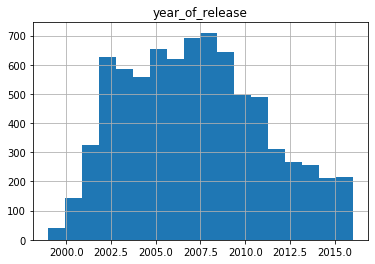

In [30]:
df = df[df['year_of_release'] > 1998]
df.hist(column='year_of_release', bins=df.year_of_release.nunique());

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Как думаешь, с чем связан спад в индустрии последних лет?
</div>

### 2.2 Распределение суммы продаж по платформам в разрезе времени

In [31]:
platforms_grouped = df.groupby('platform')['total_sales'].sum()
platforms_grouped.sort_values(ascending=False)

platform
PS2     981.500000
X360    858.500000
PS3     789.000000
Wii     682.000000
DS      434.250000
PS4     243.000000
XB      226.625000
PSP     196.500000
PC      180.000000
GC      169.375000
GBA     166.500000
XOne    129.625000
PS      125.937500
3DS     124.125000
WiiU     66.250000
PSV      30.937500
DC        4.546875
Name: total_sales, dtype: float16

In [32]:
def plot_platform_sales_chart(df, figsize=(12,8)):
    legend = []
    years = df.year_of_release.unique()
    platforms = df.platform.unique()
    for platform in platforms:
        legend.append(platform)
        ax = df[df.platform == platform].groupby('year_of_release')['total_sales'].sum().plot(grid=True, figsize=figsize, xticks=years, lw=2)
    ax.legend(legend)

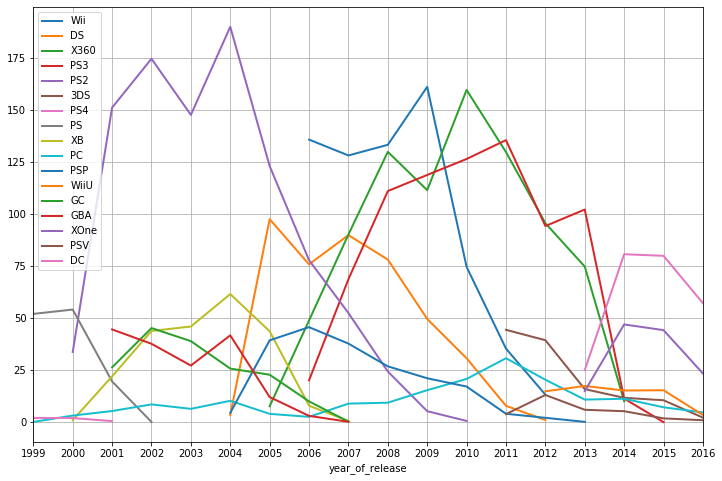

In [33]:
plot_platform_sales_chart(df)

Проанализировав график продаж по платформам в разрезе времени, получаем следующие выводы:
- Игровые платформы "живут" от 6 до 10 лет, однако есть и исключение - PC на протяжении долгого времени (с самого появления и по сей день) остаётся на плаву
- Среди популярных в прошлом платформ выделяются PS2, PS, DS, GBA

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>

Значение средней продолжительности существования платформы приведено. Однако выводы ты делаешь по графику. Стоит также привести расчет данного значения. Подумай, стоит ли включать в расчет все платформы. Будут ли выбросы по продолжительности существования платформ?

</div>

Посмотрим на распределение платформ в 2016 году по сумме продаж

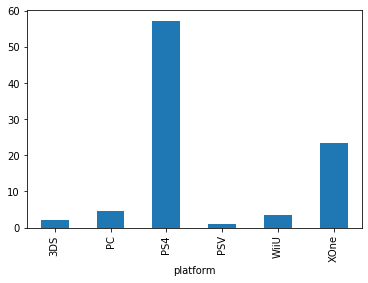

In [34]:
df_2016 = df[df.year_of_release == 2016]
df_2016.groupby('platform')['total_sales'].sum().plot(kind="bar");

Чтобы уменьшить искажение распределения по платформам в данных, посмотрим на самые ранние годы, за которые у нас есть данные по нашим платформам:

In [35]:
df[df.platform.isin(df_2016.platform.unique())] \
.pivot_table(index=['platform'], aggfunc=['min'], values='year_of_release')

,min
,year_of_release
platform,
3DS,2011
PC,1999
PS4,2013
PSV,2011
WiiU,2012
XOne,2013


Известно, что платформа PC уже давно актуальна, а вот остальные платформы появились в 2011 году и позднее. Далее будем использовать данные начиная с 2011 года.

In [36]:
df_since_2011 = df[df.year_of_release >= 2011]

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Актуальный период назван. Так в рассмотрение попадут только последние поколения платформ, а также будем рассматривать только конечный на данный момент интервал развития игровой индустрии. 

</div>

Посмотрим на данные еще раз, теперь только с 2011 года, а также исключим платформы, у которых уже есть продажи в 2016 году:

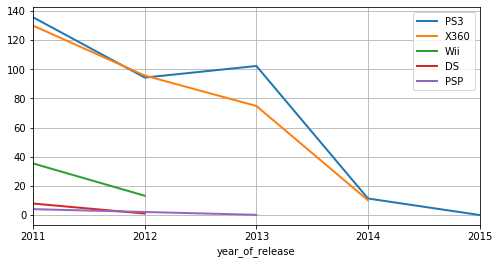

In [37]:
dead_platforms_df = df_since_2011[~df_since_2011.platform.isin(df_2016.platform.unique())]
plot_platform_sales_chart(dead_platforms_df, figsize=(8,4))

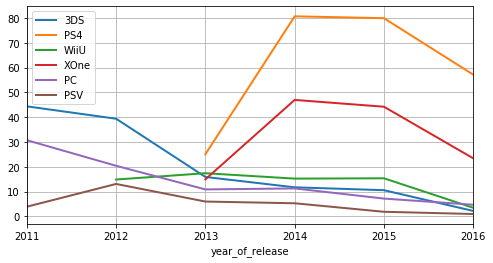

In [38]:
alive_platforms_df = df_since_2011[df_since_2011.platform.isin(df_2016.platform.unique())]
plot_platform_sales_chart(alive_platforms_df, figsize=(8,4))

Из графиков получаем следующую информацию по платформам:
- XOne, PS4 самые актуальные платформы, их продажи на 2016 год упали. Это произошло потому, что у нас неполные данные за 2016 год. В реальности, скорее всего, по состоянию на конец года продажи сильно выросли.
- Продажи Wii, DS, PSP, X360, PS3 упали до 0 к 2015 году в связи выходом нового поколения консолей
- к перпспективным платформам на ближайшие годы можно отнести PS4, XOne и PC. Первые две появились недавно и пришли на замену сверхпопулярным PS3 и X360, а PC всегда была актуальна ;)

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Да, именно эти платформы мы и можем назвать перспективными на 2017 год. 

</div>

### 2.3 Диаграмма размаха продаж по актуальным платформам

Построим диаграмму размаха (boxplot) для самый популярных платформ. Сразу огранимичим масштаб, дабы выбросы не мешали анализировать график:

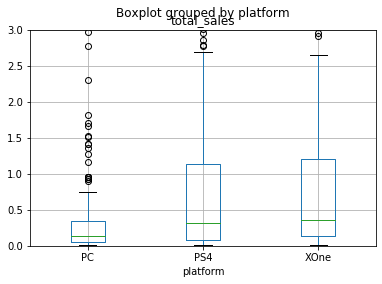

In [39]:
df_since_2011[df_since_2011.platform.isin(['XOne', 'PS4', 'PC'])].boxplot(by='platform', column='total_sales')
plt.ylim(0, 3);

Смотрим на график размаха и делаем выводы:
- В среднем издатели получают больше прибыли от продаж игры на консолях, чем на PC (медиана продаж на консолях больше, а также сам "ящик" шире)
- Большие выбросы в данных присутствуют на всех 3 платформах, это означает что на каждой платформе выходят ААА-проекты, продажи которых уходят далеко за границы продаж "обычных", средних релизов

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>
 
Подумай, из-за чего формируется разница между платформами. Старайся не только описывать результат, но и трактовать его. 

</div>

### 2.4 Влияние отзывов на продажи

Исследуем влияние отзывов пользователей и критиков на продажи игр на платформе PS4. Построим scatter plot для признаков user_score и critic_score:

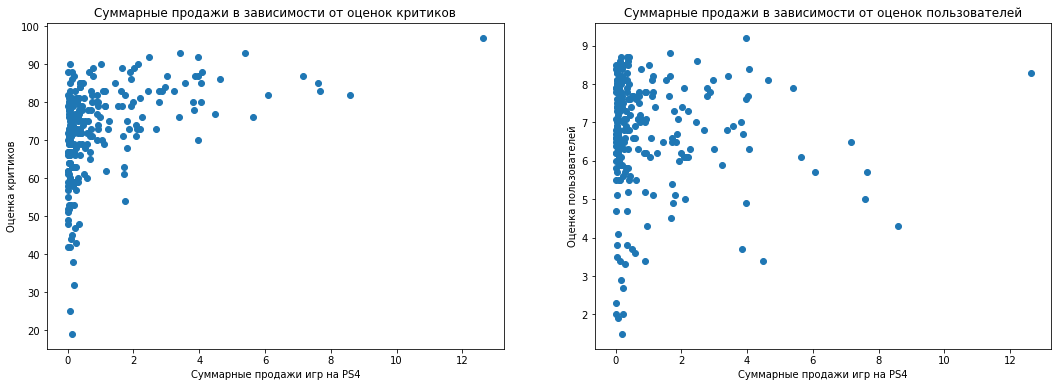

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
axes[0].scatter(x=df_since_2011[df_since_2011.platform == 'PS4']['total_sales'], y=df_since_2011[df_since_2011.platform == 'PS4']['critic_score'])
axes[0].set_title("Суммарные продажи в зависимости от оценок критиков")
axes[0].set_xlabel("Суммарные продажи игр на PS4")
axes[0].set_ylabel("Оценка критиков")
axes[1].scatter(x=df_since_2011[df_since_2011.platform == 'PS4']['total_sales'], y=df_since_2011[df_since_2011.platform == 'PS4']['user_score'])
axes[1].set_title("Суммарные продажи в зависимости от оценок пользователей")
axes[1].set_xlabel("Суммарные продажи игр на PS4")
axes[1].set_ylabel("Оценка пользователей");

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>
 
Графики стоит перевернуть. По оси X указывается независимая переменная. 

</div>

Судя по графику, оценки суммарные продажи сильнее коррелируют с оценками критиков, нежели с оценками пользователей. Посмотрим на корреляции:

In [41]:
df_since_2011[df_since_2011.platform == 'PS4'][['total_sales', 'user_score', 'critic_score']].corr()

,total_sales,user_score,critic_score
total_sales,1.000000,-0.031758,0.403896
user_score,-0.031758,1.000000,0.572478
critic_score,0.403896,0.572478,1.000000


Получаем следующие итоги:
- Между оценками критиков и продажами игр есть заметная корреляция, а вот между оценками пользователей и суммарными продажами она практически нулевая. Это может быт связано с тем, что критики зачастую получают игру раньше релиза, и могут опубликовать свою оценку игры еще до ее релиза, тем самым предопределив будущие продажи игры

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>
 
Анализ проведен. Здорово, что ты обосновал причину получения такого результата. Стоит также рассмотреть и другие платформы. Делать выводы лишь по одной из них мы не можем. 

</div>

### 2.5 Распределение игр по жанрам

Сгруппируем игры по жанрам и посмотрим на гистограмму:

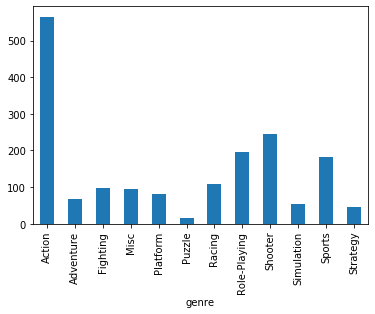

In [42]:
df_since_2011.groupby('genre')['genre'].count().plot(kind='bar');

Больше всего игр имеют жанр Action, меньше всего - Puzzle. Посмотрим на распределение суммарных продаж по жанрам:

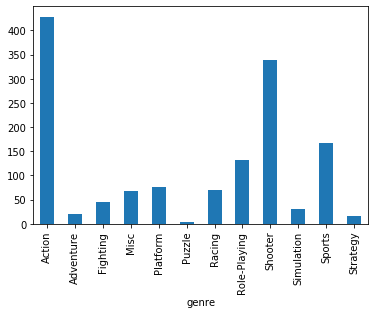

In [43]:
df_since_2011.groupby('genre')['total_sales'].sum().plot(kind='bar');

Из графиков видим следующую информацию:
- Самые прибыльные жанры - Action и Shooter, неплохие продажи имеют игры жанра Sports
- Хуже всего продаются игры жанра Puzzle, Strategy, Adventure

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Анализ популярности жанров проведен. Однако не стоит забывать, что производство игр в жанрах Action или Shooter обходится сильно дороже, чем производство Puzzle-игр. 

</div>

# 3. Портреты пользователей разных регионов

### 3.1 Популярность платформ по регионам

In [44]:
def get_regional_stats(df, groupby_column):
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    axes[0].set_title("Продажи в Японии")
    axes[1].set_title("Продажи в Северной Америке")
    axes[2].set_title("Продажи в Европе")
    df.groupby(groupby_column)['jp_sales'].sum().sort_values(ascending=False)[:5].plot.bar(ax=axes[0])
    df.groupby(groupby_column)['na_sales'].sum().sort_values(ascending=False)[:5].plot.bar(ax=axes[1])
    df.groupby(groupby_column)['eu_sales'].sum().sort_values(ascending=False)[:5].plot.bar(ax=axes[2])

Посмотрим на самые популярные платформы в разрезе регионов:

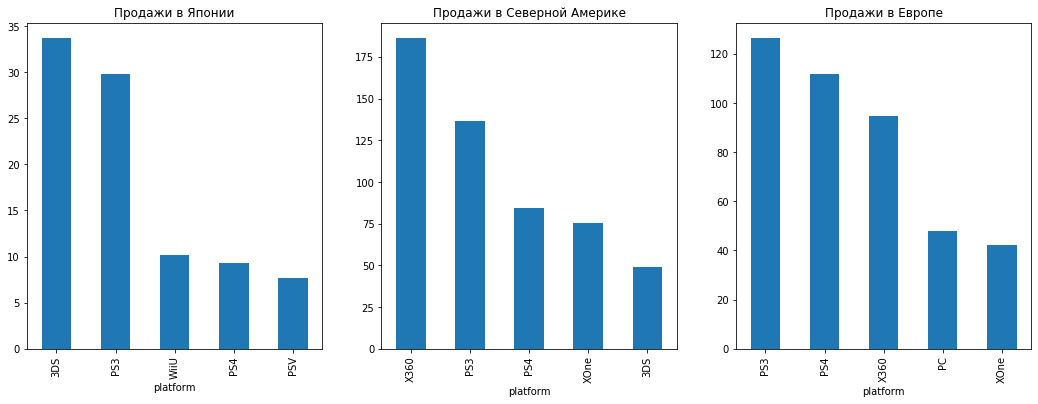

In [45]:
get_regional_stats(df_since_2011, 'platform');

Относительно распределения по платформам в разных регионах можно сделать следующие выводы:
- В США и Японии предпочитают консоли своего производства (X360 и PS3/PS4 соответственно)
- В Японии популярны 3DS и WiiU, которой нет даже в пятерке самых самых популярных консолей в Европе. WiiГ вообще отсутствует в топе Европы и США
- В Европе много игр продается на платформе PC, в США и Японии PC не попала в список самых популярных платформ


### 3.2 Популярность жанров по регионам

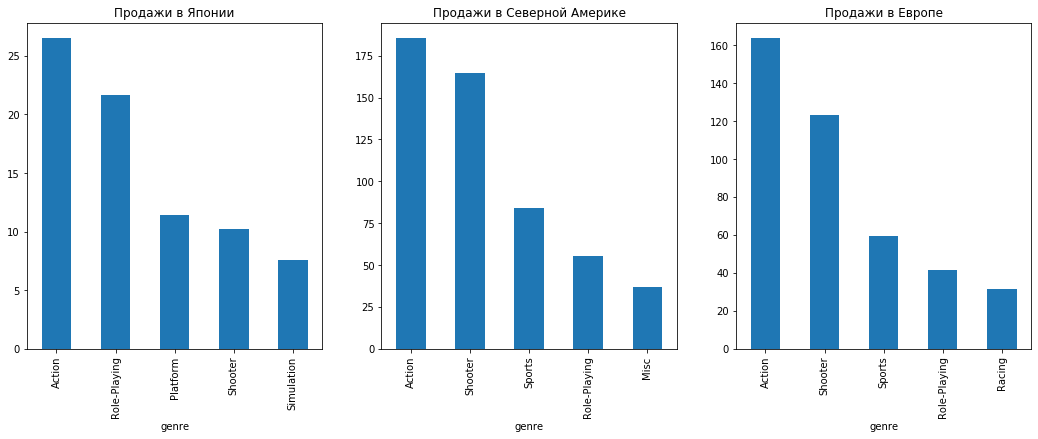

In [46]:
get_regional_stats(df_since_2011, 'genre')

Выводы:
- В Японии больше чем в других регионах популярен жанр RPG (там его и придумали)
- В Японии живут более хардкорные игроки, т.к. среди популярных жанров - платформеры
- В США и Европе жанры распределены по популярности практически одинаково

### 3.3 Влияние рейтинга ESRB на продажи

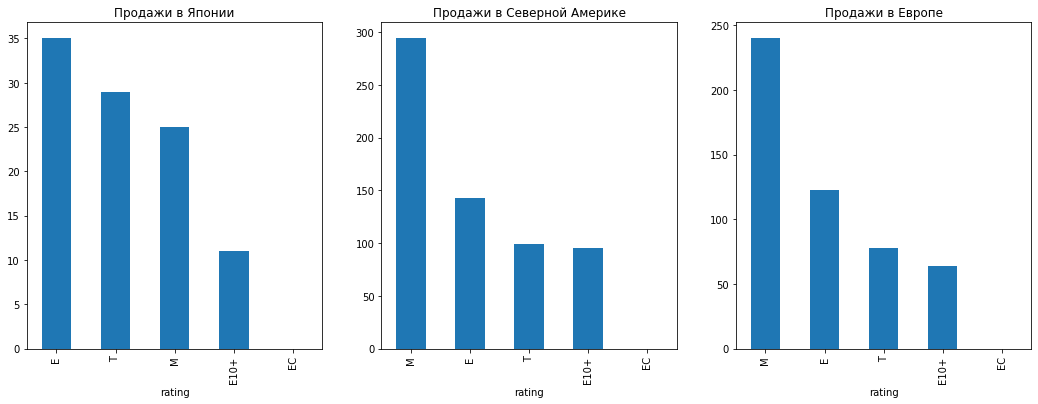

In [47]:
get_regional_stats(df_since_2011, 'rating')

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

В параметре рейтинга будет большое число пропусков после того, как ты уберешь удаление пропусков. Учти, что игры бер рейтинга также стоит учесть при анализе влияния на выручку. Иначе огромная часть игр просто выпадает из анализа. Найди способ учесть их при группировке значений по рейтингу.
    
</div>

Из графика видно, что:
- Япония отличается от остальных регионов: там лучше всего продаются игры с самым доступным рейтингом (рейтинг E значит Everyone, т.е. подходит всем)

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Портрет типичного пользователя каждого из регионов получен. Приведены все необходимые графики. Здорово, что отмечены индивидуальные особенности каждого региона. 

</div>

# 4. Исследование статистических показателей

Сгруппируем данные по жанрам, посчитаем среднее значение, стандартное отклонение, дисперсию для оценок пользователей и критиков в каждом жанре. Получим сводную таблицу:

In [48]:
genre_stats = df_since_2011.groupby('genre')[['critic_score', 'user_score']].agg([np.mean, np.std, np.var])
genre_stats

critic_score                     user_score                    
                     mean        std      var       mean       std       var
genre                                                                       
Action           69.93750  12.789062  163.500   6.781250  1.302734  1.697266
Adventure        72.06250  12.210938  149.125   7.460938  1.299805  1.688477
Fighting         70.68750  13.195312  174.125   6.894531  1.375977  1.894531
Misc             70.37500  10.859375  118.000   6.898438  1.208984  1.461914
Platform         74.93750  13.101562  171.750   7.164062  1.495117  2.236328
Puzzle           70.00000  10.203125  104.125   6.949219  1.216797  1.481445
Racing           71.12500  13.273438  176.125   6.308594  1.575195  2.480469
Role-Playing     73.56250  12.000000  144.000   7.238281  1.237305  1.530273
Shooter          73.18750  13.101562  171.750   6.437500  1.570312  2.466797
Simulation       63.71875  13.179688  173.625   6.210938  1.854492  3.439453
Sports           72.43750  15.046875  226.500   5.933594  1.395508  1.947266
Strategy         73.62500  13.218750  174.750   6.648438  1.704102  2.902344

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Здорово, что все стат. показатели ты собрал в единую таблицу. Так нам заметно проще сравнивать жанры между собой. 

</div>

Для более наглядного отображения построим графики:

In [49]:
def get_genre_stats(df, score_column):
    fig, axes = plt.subplots(1, 3, figsize=(24, 4))
    fig.suptitle('Распределение среднего значения, стандартного отклонения и дисперсии для %s в разрезе жанров' % score_column)
    for i, stat in enumerate(df[score_column].columns):
        df[score_column][stat].plot.bar(ax=axes[i])
        axes[i].set_title(stat)

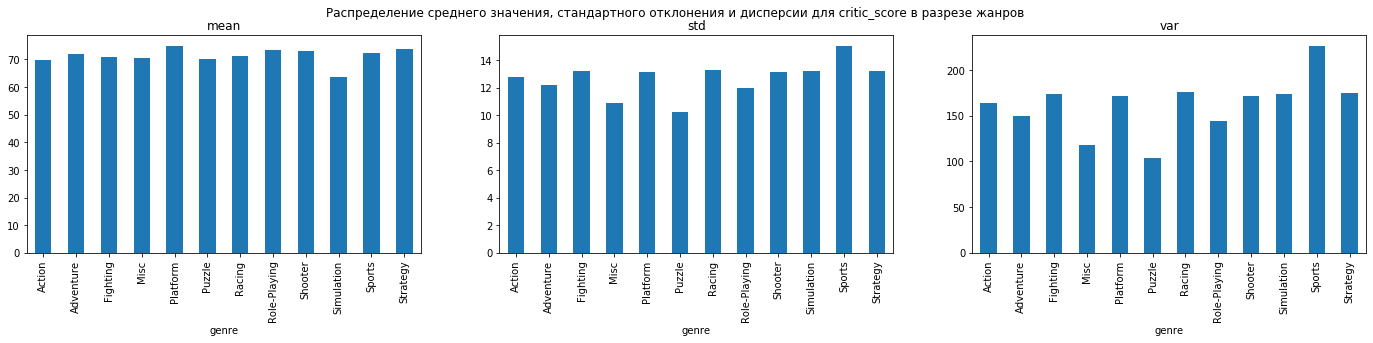

In [50]:
get_genre_stats(genre_stats, 'critic_score')

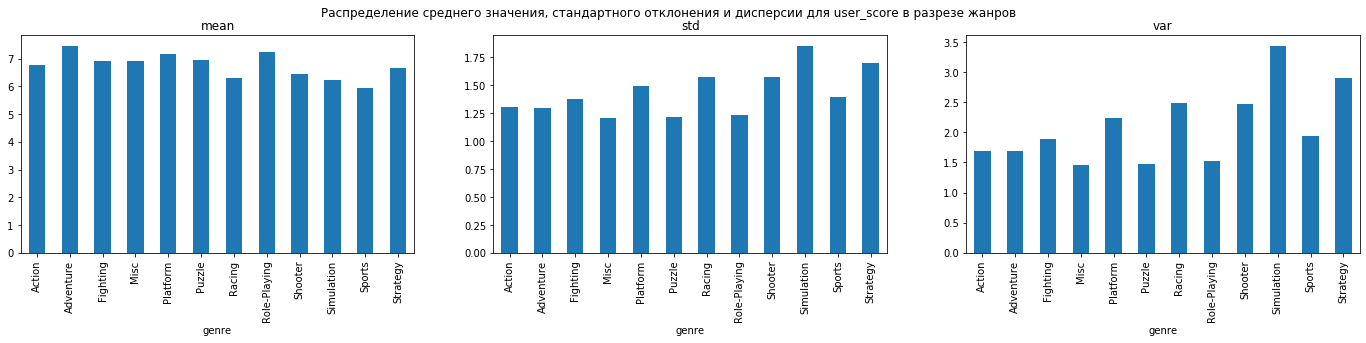

In [51]:
get_genre_stats(genre_stats, 'user_score')

Проанилизировав гистограммы делаем выводы:
- Оценки пользователей и критиков по жанрам имеют распределение близкое к равномерному, в случае с оценками пользователей среднее значение равняется 7, оценки критиков в среднем стремятся к 70 из 100 баллов
- Наивысшую среднюю оценку среди пользователей имеют игры в жане Adventure и RPG
- Наивысшую среднюю оценку среди критиков имеют платформеры
- Наибольший разброс оценок пользвателей (дисперсию и стандартное отклонение) имеют игры спортивного жанра
- Наибольший разброс среди оценок критиков имеют игры в жане Simulation

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

Нас просят построить гистограммы по жанрам, а не столбчатые диаграммы. Исправь данную неточность. О различиях данных типов гарфиков смотри [тут](https://lh3.googleusercontent.com/proxy/SWH51-vOc0vOrqjvrNbjGaNuMw-hjOFCqYYDWGtY6HsFkznehkxgL7skz8wGT1dNeNsCrgY516cAGJguhkZd-pJyn1odmMZhVNw).

</div>

# 4. Проверка статистических гипотез

### 4.1 Проверка гипотезы о равенстве средних пользовательских рейтингов Xbox One и PC

Проверим гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Для начала получим нужные выборки

In [52]:
xone_user_ratings = df_since_2011[df_since_2011.platform == 'XOne']['user_score']
pc_user_ratings = df_since_2011[df_since_2011.platform == 'PC']['user_score']
pc_user_ratings.name = 'pc'
xone_user_ratings.name = 'xone'
print('Количество оценок PC %s, количество оценок XOne %s' % (pc_user_ratings.shape[0], xone_user_ratings.shape[0]))

Количество оценок PC 259, количество оценок XOne 161


Перед нами задача проверить гипотезу о равенстве средних двух генеральных совокупностей. Посмотрим на диаграммы размаха и гистограммы:

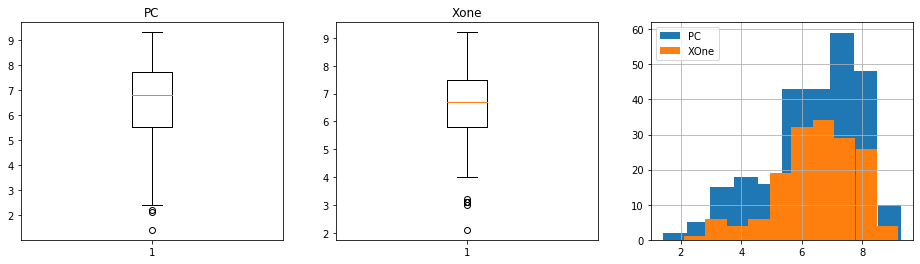

In [53]:
fig, ax = plt.subplots(1, 3, figsize=(16, 4))
ax[0].boxplot(pc_user_ratings.values)
ax[0].set_title("PC")
ax[1].boxplot(xone_user_ratings.values)
ax[1].set_title("Xone")
ax[2] = pc_user_ratings.hist(ax=ax[2], label="PC")
ax[2] = xone_user_ratings.hist(ax=ax[2], label="XOne");
ax[2].legend();

Видим, что диаграммы размаха очень похожи, медианные значения пересекаются внутри интеквартильных размахов. Можно предположить, что пользовательские рейтинги не отличаются. Для того чтобы сделать это с помощью статистики, можно воспользоваться t-критерием Стьюдента

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Классное сравнение платформ. Видим, что различия небольшие. Давай проверим теперь их наличие при помощи стат. теста. 
</div>

t-критерий Стьюдента выбираем из предположения о том, что выборки взяты из нормальных распределений, дисперсия которых неизвестна. На гистограмме выше видим, что оба распределения немного скошены влево. Проверим нормальность распределений визуально с помощью probplot:

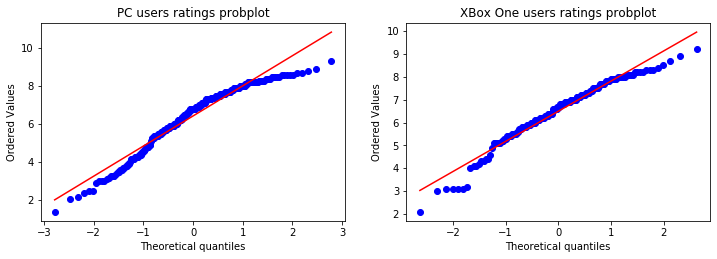

In [54]:
plt.figure(figsize=(12,8))
ax = plt.subplot(2,2,1)
stats.probplot(pc_user_ratings, dist="norm", plot=ax)
ax.set_title("PC users ratings probplot")
ax = plt.subplot(2,2,2)
stats.probplot(xone_user_ratings, dist="norm", plot=ax)
ax.set_title("XBox One users ratings probplot")
plt.show()

На probplot для оценок PC заметны отклонения от нормальности. Однако мы имеем дело с достаточно большими выборками (259 и 161 элемент), что позволяет нам в некоторой степени пренебречь отклонениями от нормального распределения у выборок.

Воспользуемся t-критерием Стьюдента для двух независимых выборок с $\alpha$ = 0.05. Соответствующие гипотезы:

$H_0\colon$ средние значения оценок пользователей для игр на ПК и Xbox One одинаковы

$H_1\colon$ средние значения оценок пользователей для игр на ПК и Xbox One не одинаковы.

In [55]:
stats.ttest_ind(pc_user_ratings.values, xone_user_ratings.values, equal_var = False)

Ttest_indResult(statistic=-0.4306331326932344, pvalue=0.666975325672938)

Получили p-value > 0.05, **нет оснований отвергать нулевую гипотезу**.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Гипотезы сформулированы и проверены верно.

</div>

### 4.2 Проверка гипотезы о различии средних пользовательских оценок для жанров Action и Sports

Аналогично предыдущему пункту, сначала получим нужные выборки

In [56]:
action_user_ratings = df_since_2011[df_since_2011.genre == 'Action']['user_score']
sports_user_ratings = df_since_2011[df_since_2011.genre == 'Sports']['user_score']
action_user_ratings.name = 'action'
sports_user_ratings.name = 'sports'
print('Количество оценок в жанре Action %s, количество оценок в жанре Sports %s' % (action_user_ratings.shape[0], sports_user_ratings.shape[0]))

Количество оценок в жанре Action 565, количество оценок в жанре Sports 183


Посмотрим на диаграммы размаха и гистограммы:

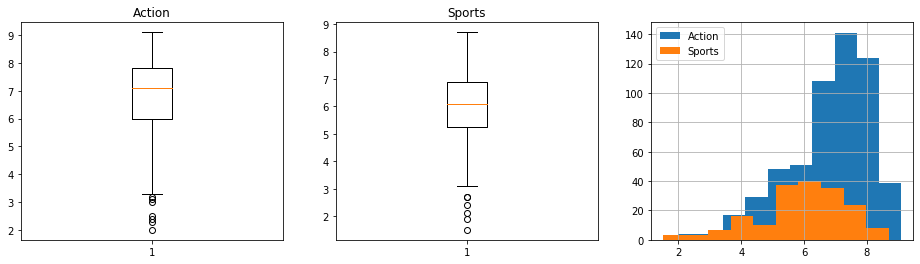

In [57]:
fig, ax = plt.subplots(1, 3, figsize=(16, 4))
ax[0].boxplot(action_user_ratings.values)
ax[0].set_title("Action")
ax[1].boxplot(sports_user_ratings.values)
ax[1].set_title("Sports")
ax[2] = action_user_ratings.hist(ax=ax[2], label="Action")
ax[2] = sports_user_ratings.hist(ax=ax[2], label="Sports");
ax[2].legend();

Из диаграмм размаха видим, что медианные значения для оценок различны. Для Action это около 7, а для Sports - ближе к 6. Делаем предположение, что средние оценки действительно различны. Посмотрим на probplot для выборок:

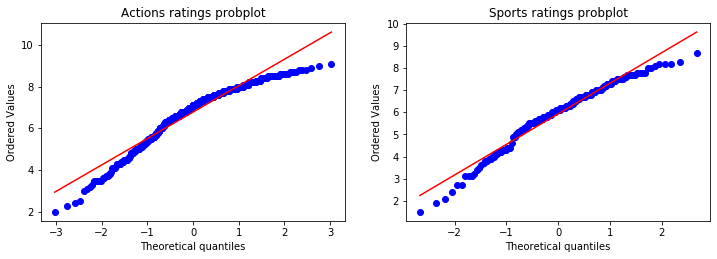

In [58]:
plt.figure(figsize=(12,8))
ax = plt.subplot(2,2,1)
stats.probplot(action_user_ratings, dist="norm", plot=ax)
ax.set_title("Actions ratings probplot")
ax = plt.subplot(2,2,2)
stats.probplot(sports_user_ratings, dist="norm", plot=ax)
ax.set_title("Sports ratings probplot")
plt.show()

Аналогично предыдущему пункту, воспользуемся t-критерием Стьюдента для двух независимых выборок. Исследуемые выборки имеют распределения, отличающиеся от нормальных, однако учитывая размер выборок можно считать эти отличия несущественным

Сформулируем гипотезы, использовать критерий будем с уровнем значимости $\alpha$ = 0.05

$H_0\colon$ средние значения оценок пользователей для игр в жанре Action и Sports одинаковы

$H_1\colon$ средние значения оценок пользователей для игр в жанре Action и Sports не одинаковы

In [59]:
stats.ttest_ind(action_user_ratings.values, sports_user_ratings.values, equal_var = False)

Ttest_indResult(statistic=7.258067987767236, pvalue=3.5701647034612384e-12)

Получили практически нулевой уровень значимости, **отвергаем нулевую гипотезу** в пользу альтернативной. То есть **оценки пользователей в жанрах Actions и Sports значимо отличаются.**

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

Прежде чем произвести проверку гипотезы через T-критерий Стьюдента произведи проверку дисперсии выборок, чтобы понять с каким параметром использовать метод проверки. Параметр equal_varты уточнил, однако не совсем ясна причина, по которой мы должны использовать False. Обоснуй данный выбор. Если при их сравнении мы получим расхождение более чем в 5%, то мы можем сказать, что дисперсии различны. Также проверить равенство дисперсий нам может помочь [такой тест](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html).

</div>

# 5. Общие выводы

По результатам проведенного исследования делаем выводы:

- Игра достигнет наибольшего успеха если будет выпущена на 4 самых популярных платформах: PS4, XOne, PC, 3DS (для охвата рынка Японии)
- Рейтинг игры должен быть E или T (одни из самых доступных рейтингов для людей любого возвраста)
- Игра должна быть в жанре Action, Shooter либо RPG

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

Финальный вывод и есть главный результат твоей работы. Стоит писать его подробно по результатам проведенной работы. В нем можно приводить полученные в ходе работы значения. Также можно расписать все, что было сделано в работе.

</div>

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>

Если тебе нравится тема визуализации, то можешь изучить методы библиотеки seaborn. Она позволяет строить довольно презентабельные графики.

Ты выполнил все пункты работы, молодец! Критических замечаний немного. Однако их важно исправить. Также есть достаточное число желтых комментариев, которые стоит исправить. Думаю, ты справишься с этим быстро. Жду твою работу :)

</div>